In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('data/movies.csv')

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
df['year'] = df['year'].apply(str)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   object 
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), object(10)
memory usage: 898.7+ KB


In [7]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [8]:
df_genero = df.groupby(['year', 'genre'], as_index=False).agg({'name': 'count'})
df_genero

,year,genre,name
0,1980,Action,14
1,1980,Adventure,7
2,1980,Animation,2
3,1980,Biography,6
4,1980,Comedy,36
...,...,...,...
410,2020,Comedy,3
411,2020,Crime,1
412,2020,Drama,7
413,2020,Horror,2


NameError: name 'ax' is not defined

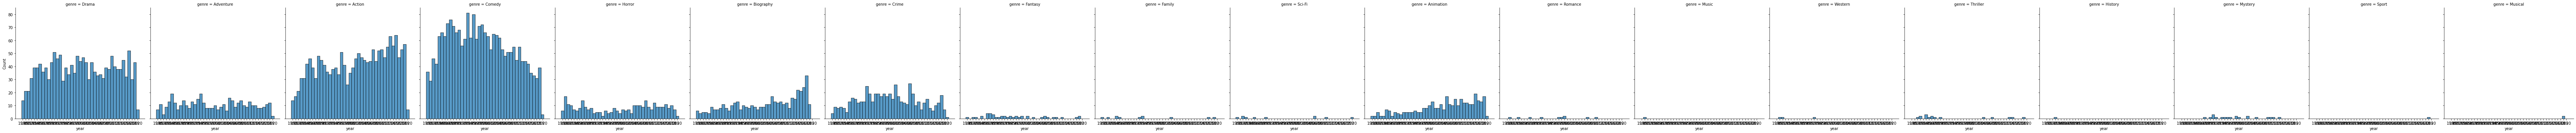

In [9]:
sns.displot(data=df, x='year', col='genre', discrete=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50);

In [10]:
df_gnr_top = df['genre'].value_counts().sort_values(ascending=False)
df_gnr_top = df_gnr_top.to_frame().reset_index()
df_gnr_top

,index,genre
0,Comedy,2245
1,Action,1705
2,Drama,1518
3,Crime,551
4,Biography,443
5,Adventure,427
6,Animation,338
7,Horror,322
8,Fantasy,44
9,Mystery,20


In [11]:
categories = df[['year', 'genre']].explode('genre')

In [12]:
categories.head(10)

,year,genre
0,1980,Drama
1,1980,Adventure
2,1980,Action
3,1980,Comedy
4,1980,Comedy
5,1980,Horror
6,1980,Action
7,1980,Biography
8,1980,Action
9,1980,Biography


AttributeError: 'Series' object has no attribute 'values_count'

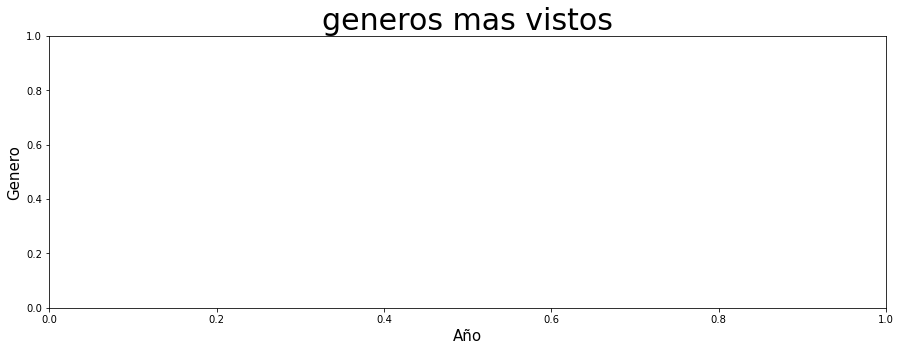

In [13]:
plt.figure(figsize=(15, 5)) #ancho, altura
plt.title('generos mas vistos', fontsize=30)
plt.xlabel('Año', fontsize=15)
plt.ylabel('Genero', fontsize=15)

x = df_genero['year']
y = df_genero['genre'].values_count

plt.scatter(x, y, s=y/1_000, c=x, cmap='inferno') #la div 1000 es para el tamaño de los circulos

plt.show()

In [ ]:
fig = px.scatter(data_frame=df_genero[df_genero['year'] == 1980], x='year',
                 y='genre', size='name', color='genre',
                 size_max=60)
fig.show()